In [7]:
#데이터 처리
import pandas as pd
#행렬 연산
import numpy as np
#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#회기 분석
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~ X1 +X2 + ...)
import statsmodels.formula.api as smf
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
#선형회귀모형
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
#Scale 변환 ->표준화 회구계수 산출
from sklearn.preprocessing import StandardScaler
#평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

#폰트 적용 시 & 음수 표시
import matplotlib.font_manager as fm
%matplotlib inline

path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
matplotlib.rc('font',family=fontprop)
matplotlib.rc('axes', unicode_minus = False)


import warnings
warnings.filterwarnings('ignore')

# 1) 의사결정나무

In [20]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/Concrete.csv")
df_raw

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate  age  strength  
0               1040.0           676.0   28     79.99  
1               1055.0           676.0   28     61.89  
2                932.0           594.0  270     40.27  
3                932.0           594.0  365     41.05  
4                978.4           825.5  360     44.30  
...                ...             ...  ...       ...  
1025             870.1           768.3   28     44.28  
1026             817.9           813.4   28     31.18  
1027             892.4           780.0   28     23.70  
1028             989.6           788.9   28     32.77  
1029             864.5           761.5   28     32.40  

[1030 rows x 9 columns]

In [23]:
df_raw.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

- 결측치 없음

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91d4506550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91d4506af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91d4506280>,
 'medians': [<matplotlib.lines.Line2D at 0x7f91d44930d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f91d44933a0>,
 'means': []}

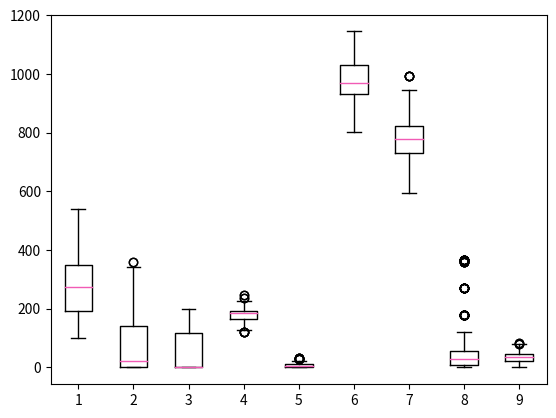

In [19]:
plt.boxplot(df_raw)

In [31]:
#중복 데이터 조회
df_raw[df_raw.duplicated()]

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0      0.0  164.9              11.6   
146   425.0               106.3      0.0  153.5              16.5   
149   425.0               106.3      0.0  153.5              16.5   
155   362.6               189.0      0.0  164.9              11.6   
157   362.6               189.0      0.0  164.9              11.6   
160   362.6               189.0      0.0  164.9              11.6   
169   425.0               106.3      0.0  153.5              16.5   
172   425.0               106.3      0.0  153.5              16.5   
177   362.6               189.0      0.0  164.9              11.6   
179   362.6               189.0      0.0  164.9              11.6   
182   362.6               189.0      0.0  164.9              11.6   
809   252.0                 0.0      0.0  185.0               0.0   

     coarse_aggregate  fine_aggregate  age  strength  
77              852.1           887.1    3     33.40  
80              852.1           887.1    3     33.40  
86              944.7           755.8    3     35.30  
88              944.7           755.8    3     35.30  
91              944.7           755.8    3     35.30  
100             852.1           887.1    7     49.20  
103             852.1           887.1    7     49.20  
109             944.7           755.8    7     55.90  
111             944.7           755.8    7     55.90  
123             852.1           887.1   28     60.29  
126             852.1           887.1   28     60.29  
132             944.7           755.8   28     71.30  
134             944.7           755.8   28     71.30  
137             944.7           755.8   28     71.30  
146             852.1           887.1   56     64.30  
149             852.1           887.1   56     64.30  
155             944.7           755.8   56     77.30  
157             944.7           755.8   56     77.30  
160             944.7           755.8   56     77.30  
169             852.1           887.1   91     65.20  
172             852.1           887.1   91     65.20  
177             944.7           755.8   91     79.30  
179             944.7           755.8   91     79.30  
182             944.7           755.8   91     79.30  
809            1111.0           784.0   28     19.69

In [146]:
#중복 데이터 제거
df_raw.drop_duplicates(inplace=True)

In [147]:
#목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["strength"]
df_raw_x=df_raw.drop("strength",axis=1,inplace=False)

In [148]:
#train_test_split(X:설명변수 데이터, Y=목표변수 데이터, test_size=test 데이터 비율,random_state: random seed)
df_train_x, df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y
                                                            , test_size=0.4,random_state=100)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size :(603, 8)
train data Y size :(603,)
test data X size:(402, 8)
test data Y size:(402,)


In [149]:
tree_uncustomized=DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
# test 데이터 설명력
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.999
Score on test set:0.834


In [150]:
#현재 생성된 트리 모델의 옵션 확인 --> 중복 x
tree_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [151]:
# train 및 test 설명력 결과 저장
train_score = []; test_score =[]
# min_samples_leaf:잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range (1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
#결과저장
df_score_leaf =pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

In [152]:
df_score_leaf.round(3)

MinSamplesLeaf  TrainScore  TestScore
0                1       0.999      0.834
1                2       0.981      0.823
2                3       0.966      0.817
3                4       0.950      0.815
4                5       0.930      0.812
5                6       0.916      0.798
6                7       0.893      0.795
7                8       0.887      0.803
8                9       0.873      0.803
9               10       0.858      0.806
10              11       0.843      0.791
11              12       0.838      0.785
12              13       0.836      0.779
13              14       0.825      0.770
14              15       0.824      0.766
15              16       0.804      0.748
16              17       0.796      0.748
17              18       0.793      0.747
18              19       0.780      0.739

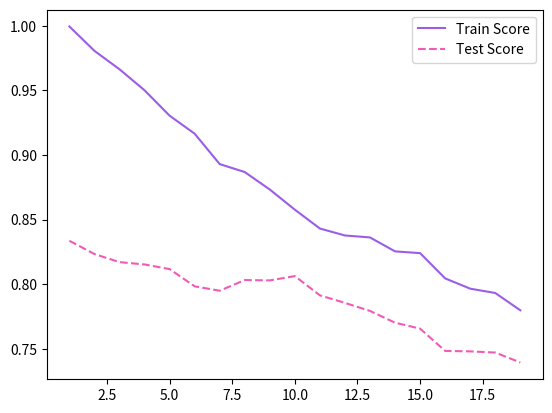

In [153]:
#모델 설명력 그래프 확인
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,test_score,linestyle="--",label="Test Score")
plt.legend()

- 잎사귀 노드 최소 자료 수 (MeansampleLeaf) 증가에 따라 모델의 설명력은 감소한다
- Train/test 데이터의 성능 변화를 고려하여 5번 선택
- test데이터의 성능 변화를 고려하면 16 선택이 가능하나 
    train 데이터의 성능이 비교적 저하되어 5번 선택

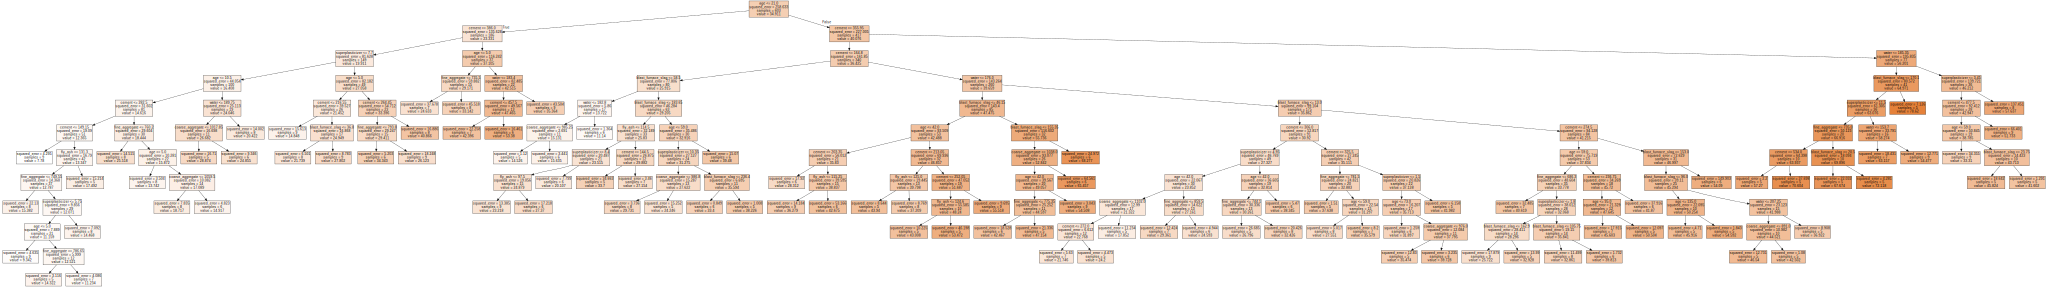

In [154]:
v_feature_name = df_train_x.columns
# 노드의 최소 자료 수 = 5 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",
               feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_leaf.dot") as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))

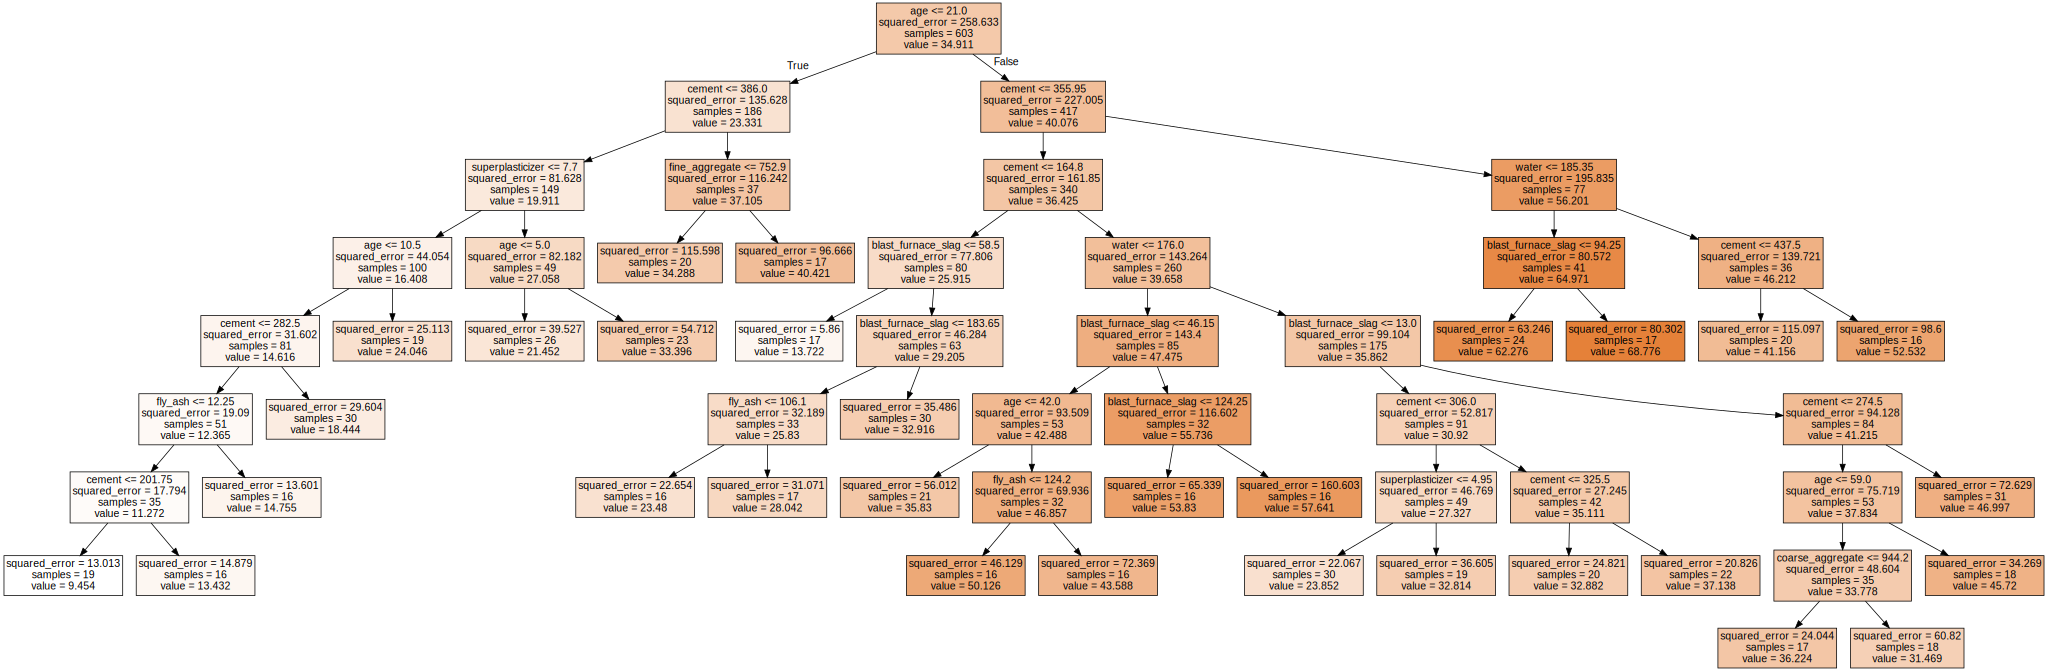

In [155]:
v_feature_name = df_train_x.columns
# 노드의 최소 자료 수 = 16 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",
               feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_leaf.dot") as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))



- min_samples_leaf --> 자료 수 5가 균형적으로 분리


In [139]:
# train 및 test 설명력 결과 저장
train_score = []; test_score =[]
# min_samples_split:분리 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range (5,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5,
                                 min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
#결과저장
df_score_split =pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score
# 모델 설명력 확인
df_score_split.round(3)

MinSamplesSplit  TrainScore  TestScore
0                10       0.930      0.812
1                12       0.922      0.803
2                14       0.916      0.802
3                16       0.906      0.807
4                18       0.901      0.799
5                20       0.892      0.796
6                22       0.883      0.791
7                24       0.873      0.786
8                26       0.867      0.788
9                28       0.856      0.778
10               30       0.846      0.770
11               32       0.837      0.761
12               34       0.820      0.746
13               36       0.818      0.752
14               38       0.794      0.740

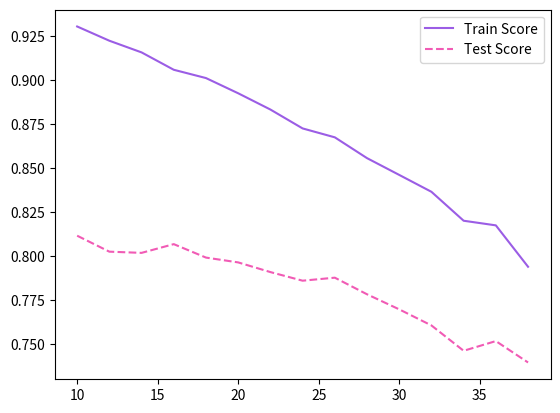

In [140]:
#모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,test_score,linestyle="--",label="Test Score")
plt.legend()

- 분리 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며, Train/test 데이터의 성능 변화를 고려하여 16선택

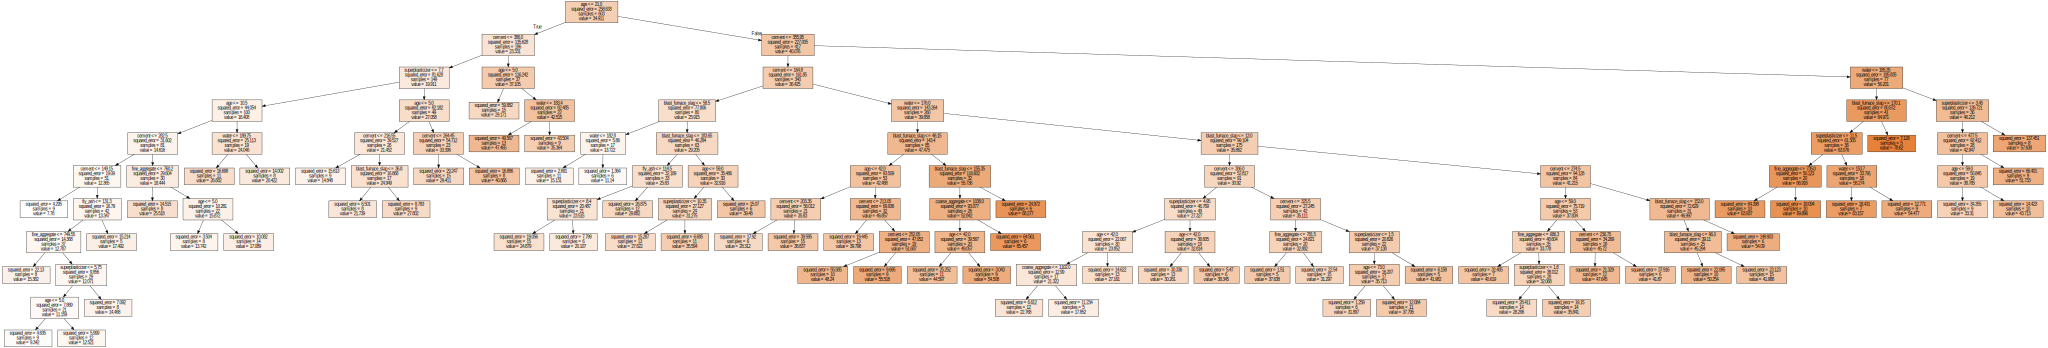

In [141]:
# 분리 노드의 최소 자료 수 = 16 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",
               feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_split.dot") as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))

In [142]:
# train 및 test 설명력 결과 저장
train_score = []; test_score =[]
# max_depth:최대 깊이 변경
para_depth = [depth for depth in range (1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5,
                                 min_samples_split=16, max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
#결과저장
df_score_depth =pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score
# 모델 설명력 확인
df_score_depth.round(3)

Depth  TrainScore  TestScore
0      1       0.231      0.292
1      2       0.445      0.481
2      3       0.596      0.602
3      4       0.707      0.687
4      5       0.789      0.747
5      6       0.842      0.772
6      7       0.885      0.797
7      8       0.901      0.801
8      9       0.905      0.807
9     10       0.906      0.807

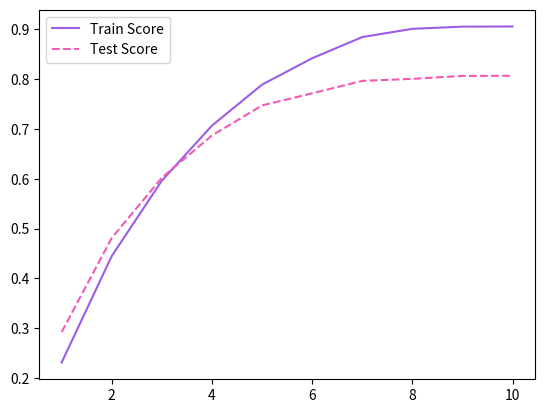

In [143]:
#모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,test_score,linestyle="--",label="Test Score")
plt.legend()

- 최대 깊이 증가에 따라 모델의 설명력은 증가하며, Train/test 데이터의 성능 변화를 고려하여 6선택

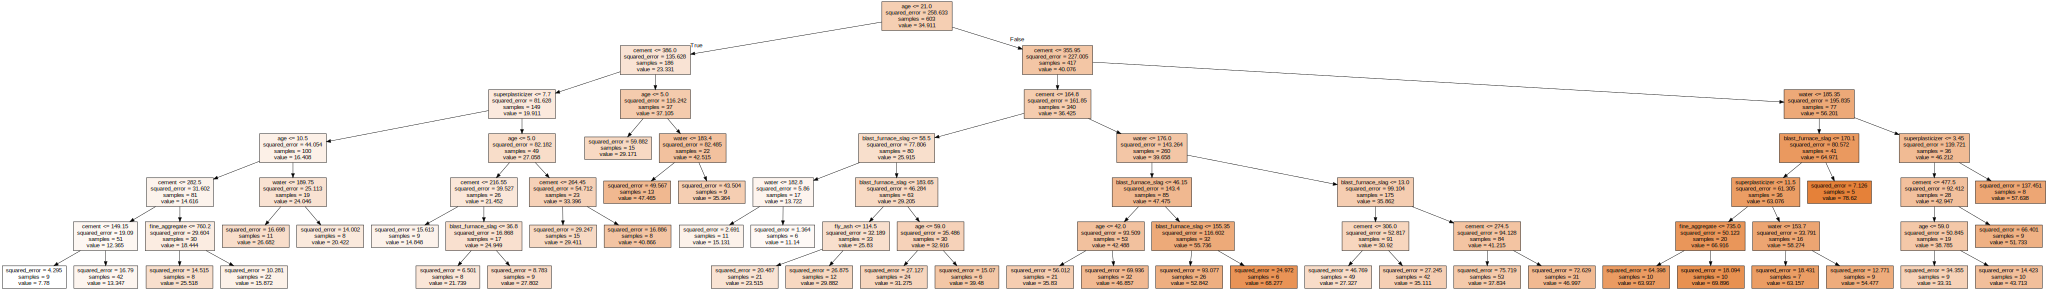

In [144]:
# 최대 깊이 = 6 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=16, max_depth = 6)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",
               feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_split.dot") as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))

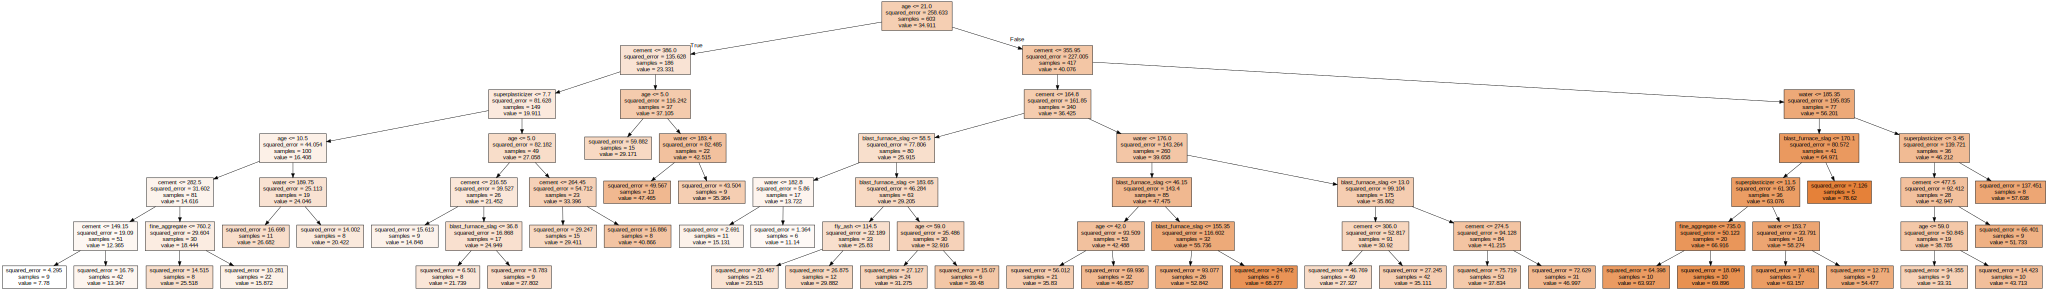

In [198]:
#최종 모델
tree_final = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=16,
                                   max_depth=6,random_state=1234)
tree_final.fit(df_train_x,df_train_y)

export_graphviz(tree_final,out_file="tree_final.dot",
                feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph)) 

In [199]:
tree_final = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 2, min_samples_split = 2,max_depth = v_max_depth)
tree_final.fit(df_train_x, df_train_y)
print('Train 모델 설명력 : {}'.format(tree_final.score(df_train_x, df_train_y).round(3)))
print('Test 모델 설명력 : {}'.format(tree_final.score(df_test_x, df_test_y).round(3)))

Train 모델 설명력 : 0.975
Test 모델 설명력 : 0.814


In [83]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False,inplace=True)
df_importance.round(3)

Feature  Importance
0              cement       0.444
7                 age       0.332
1  blast_furnace_slag       0.091
3               water       0.090
4    superplasticizer       0.028
5    coarse_aggregate       0.009
6      fine_aggregate       0.004
2             fly_ash       0.002

Text(0, 0.5, '변수')

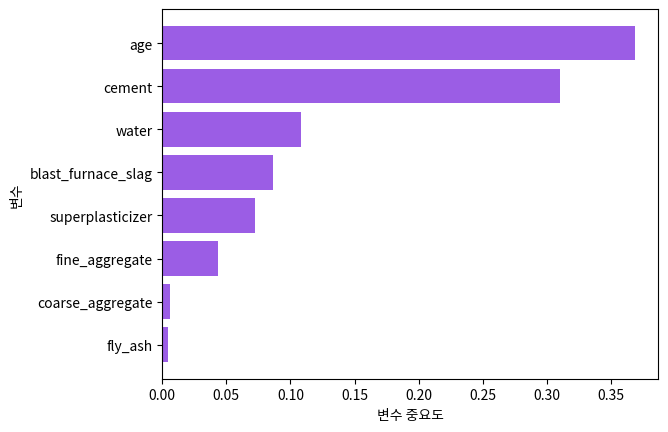

In [197]:
# 설명 변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width =df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 의사결정나무
### leaf = 5
### split= 16
### depth = 6 을 선택하여
    
## parameter 설정 전
### Train : 0.999
### Test: 0.834
    
## Parameter 설정 후
### Train : 0.975
### Test : 0.814
    
    
# 결론: 콘크리트에서 강도를 분류하는 가장 중요한 변수는 age, cement이다.

# 2) Random Forest

In [133]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/Concrete.csv")
#중복 데이터 제거
df_raw.drop_duplicates(inplace=True)

In [134]:
#목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["strength"]
df_raw_x=df_raw.drop("strength",axis=1,inplace=False)

In [135]:
#train_test_split(X:설명변수 데이터, Y=목표변수 데이터, test_size=test 데이터 비율,random_state: random seed)
df_train_x, df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y
                                                            , test_size=0.4,random_state=100)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size :(603, 8)
train data Y size :(603,)
test data X size:(402, 8)
test data Y size:(402,)


In [136]:
rf_uncustomized=RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
# test 데이터 설명력
print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.985
Score on test set:0.906


In [96]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [97]:
# train 및 test 설명력 결과 저장
train_score = []; test_score =[]
# n_estimatos: 트리 수 변경 : 1 ~ 100
para_n_tree = [n_tree * 10 for n_tree in range (1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_n =pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

In [99]:
#모델 설명력 확인
df_score_n.round(3)

n_estimators  TrainScore  TestScore
0            10       0.979      0.880
1            20       0.983      0.886
2            30       0.983      0.886
3            40       0.985      0.888
4            50       0.985      0.888
5            60       0.986      0.888
6            70       0.986      0.889
7            80       0.986      0.888
8            90       0.986      0.888
9           100       0.986      0.888

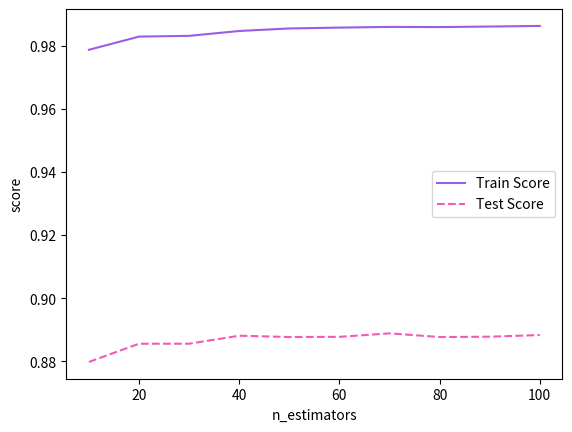

In [101]:
plt.plot(para_n_tree,train_score,linestyle="-",label="Train Score")
plt.plot(para_n_tree,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

- 생성하는 결정 트리 수 증가에 따라 모델의 설명력은 증가하며,
    Train과 test의 차이가 가장 적은 70 선택

In [102]:
# train 및 test 설명력 결과 저장
train_score = []; test_score =[]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range (1,51)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators = 70, min_samples_leaf = v_min_samples_leaf , random_state=100)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_leaf =pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

In [103]:
df_score_leaf.round(3)

MinSamplesLeaf  TrainScore  TestScore
0                1       0.986      0.888
1                2       0.974      0.879
2                3       0.960      0.868
3                4       0.948      0.856
4                5       0.935      0.847
5                6       0.925      0.838
6                7       0.913      0.826
7                8       0.901      0.815
8                9       0.892      0.807
9               10       0.883      0.799
10              11       0.873      0.791
11              12       0.863      0.782
12              13       0.855      0.776
13              14       0.846      0.768
14              15       0.840      0.765
15              16       0.835      0.760
16              17       0.830      0.755
17              18       0.824      0.749
18              19       0.818      0.743
19              20       0.811      0.739
20              21       0.805      0.734
21              22       0.801      0.730
22              23       0.796      0.726
23              24       0.789      0.720
24              25       0.783      0.713
25              26       0.777      0.708
26              27       0.773      0.704
27              28       0.767      0.698
28              29       0.762      0.692
29              30       0.757      0.682
30              31       0.753      0.681
31              32       0.748      0.675
32              33       0.742      0.670
33              34       0.736      0.664
34              35       0.732      0.662
35              36       0.728      0.658
36              37       0.725      0.656
37              38       0.723      0.654
38              39       0.719      0.651
39              40       0.715      0.646
40              41       0.710      0.642
41              42       0.705      0.634
42              43       0.702      0.633
43              44       0.699      0.630
44              45       0.696      0.628
45              46       0.693      0.625
46              47       0.692      0.624
47              48       0.687      0.620
48              49       0.683      0.615
49              50       0.678      0.609

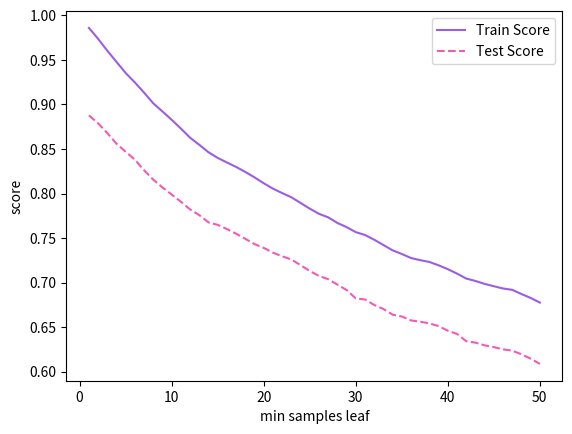

In [104]:
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

- 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며, 
    test 데이터의 정확도 변화를 고려하여 21선택

In [112]:
#train 및 test 설명력 결과 저장
train_score = []; test_score =[]
# min_samples_split: 분리 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range (20,51)]

for v_min_samples_split in para_split:
    rf = GradientBoostingRegressor(random_state=1234, min_samples_leaf=21,
                                   n_estimators=70,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_split =pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score


In [113]:
df_score_split.round(3)

MinSamplesSplit  TrainScore  TestScore
0                40       0.928      0.876
1                42       0.928      0.876
2                44       0.928      0.877
3                46       0.929      0.878
4                48       0.929      0.878
5                50       0.928      0.876
6                52       0.928      0.875
7                54       0.927      0.875
8                56       0.926      0.873
9                58       0.926      0.876
10               60       0.926      0.873
11               62       0.926      0.873
12               64       0.925      0.873
13               66       0.925      0.873
14               68       0.926      0.876
15               70       0.921      0.871
16               72       0.923      0.873
17               74       0.922      0.873
18               76       0.923      0.872
19               78       0.920      0.868
20               80       0.920      0.868
21               82       0.921      0.869
22               84       0.921      0.870
23               86       0.921      0.869
24               88       0.920      0.869
25               90       0.920      0.869
26               92       0.920      0.867
27               94       0.920      0.867
28               96       0.920      0.869
29               98       0.920      0.866
30              100       0.920      0.870

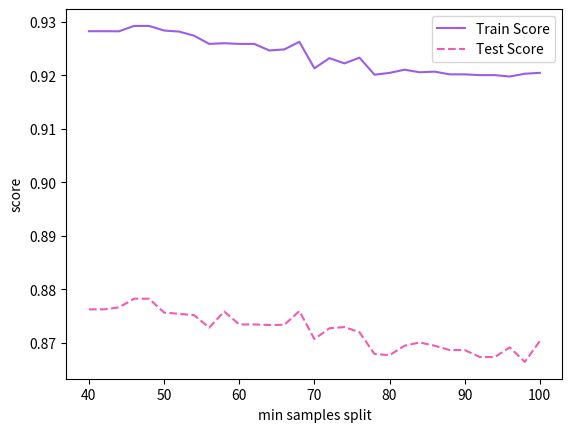

In [114]:
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며, 
    Train/test 데이터의 성능 변화를 고려하여 68선택

In [116]:
#train 및 test 설명력 결과 저장
train_score = []; test_score =[]
# min_samples_split: 분리 노드의 최소 자료 수
para_depth = [depth for depth in range (1,11)]

for v_max_depth in para_depth:
    rf = GradientBoostingRegressor(random_state=1234, min_samples_leaf=21,
                                   min_samples_split=68, max_depth=v_max_depth
                                  ,n_estimators=70)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_depth =pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score


In [117]:
df_score_depth.round(3)

Depth  TrainScore  TestScore
0      1       0.772      0.738
1      2       0.891      0.845
2      3       0.926      0.876
3      4       0.942      0.886
4      5       0.953      0.895
5      6       0.961      0.899
6      7       0.963      0.902
7      8       0.966      0.904
8      9       0.966      0.904
9     10       0.968      0.903

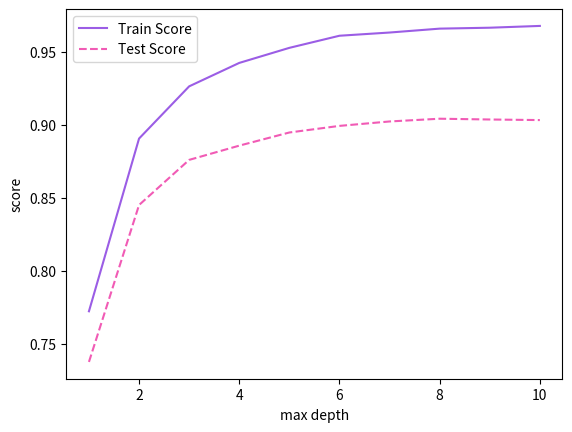

In [118]:
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

- 최대 깊이 증가에 따라 모델의 설명력은 증가하며,
    Train/test 데이터의 정확도 변화를 고려하여 5선택

In [120]:
#최종 모델
rf_final = RandomForestRegressor(min_samples_leaf=21, min_samples_split=68,max_depth=5,random_state=1234,n_estimators=70)
rf_final.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
# test 데이터 설명력
print("Score on test set:{:.3f}".format(rf_final.score(df_test_x,df_test_y)))

Score on training set: 0.749
Score on test set:0.663


In [124]:
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 21,
 'min_samples_split': 68,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [127]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False,inplace=True)
df_importance.round(3)

Feature  Importance
0              cement       0.460
7                 age       0.430
3               water       0.042
1  blast_furnace_slag       0.039
4    superplasticizer       0.023
6      fine_aggregate       0.007
5    coarse_aggregate       0.000
2             fly_ash       0.000

Text(0, 0.5, '변수')

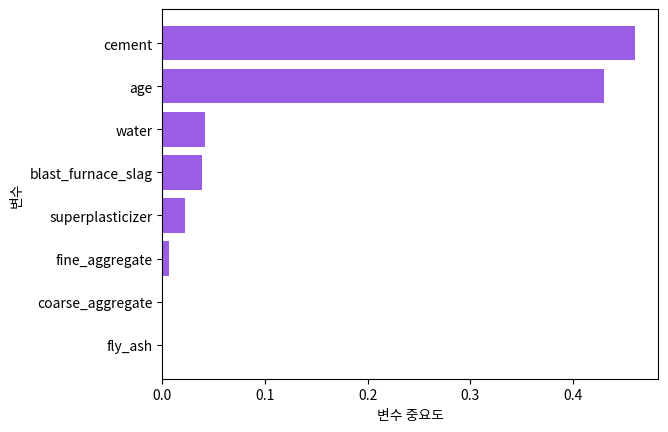

In [128]:
# 설명 변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width =df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# Random Forest

### estimators = 70
### leaf = 21
### split = 68
### depth = 5를 선택하여

## Before Parameter
### Train : 0.985
### Test : 0.906 
    
## After Parameter
### Train : 0.749
### Test : 0.663
    
# 결론: 콘크리트에서 강도를 분류하는 가장 중요한 변수는 cement, age이다.

In [156]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/Concrete.csv")
#중복 데이터 제거
df_raw.drop_duplicates(inplace=True)

In [157]:
#목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["strength"]
df_raw_x=df_raw.drop("strength",axis=1,inplace=False)

In [158]:
#train_test_split(X:설명변수 데이터, Y=목표변수 데이터, test_size=test 데이터 비율,random_state: random seed)
df_train_x, df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y
                                                            , test_size=0.4,random_state=100)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size :(603, 8)
train data Y size :(603,)
test data X size:(402, 8)
test data Y size:(402,)


In [159]:
gb_uncustomized=GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
# test 데이터 설명력
print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.954
Score on test set:0.898


In [161]:
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [171]:
# train 및 test 설명력 결과 저장
train_score = []; test_score =[]
# n_estimatos:트리 수 변경(10~100)
para_n_tree = [n_tree * 10 for n_tree in range (1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#결과저장
df_score_n =pd.DataFrame()
df_score_n["Estimators"]=para_n_tree
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score
    

In [172]:
df_score_n.round(3)

Estimators  TrainScore  TestScore
0          10       0.620      0.639
1          20       0.790      0.789
2          30       0.861      0.841
3          40       0.897      0.867
4          50       0.915      0.880
5          60       0.928      0.887
6          70       0.937      0.890
7          80       0.944      0.894
8          90       0.949      0.896
9         100       0.954      0.898

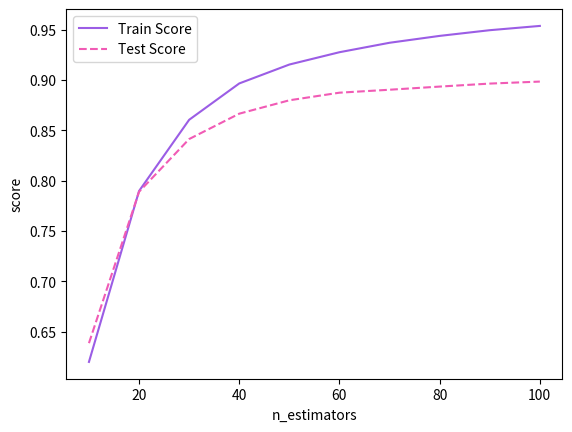

In [173]:
plt.plot(para_n_tree,train_score,linestyle="-",label="Train Score")
plt.plot(para_n_tree,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

- 트리 수 증가에 따라 모델의 설명력은 지속적으로 향상되고 있으나
    Test 데이터의 성능 변화를 고려하여 40선택

In [167]:
# train 및 test 설명력 결과 저장
train_score = []; test_score =[]
para_leaf = [n_leaf * 1 for n_leaf in range (1,21)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=40,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_leaf =pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score
    

In [168]:
df_score_leaf.round(3)

MinSamplesLeaf  TrainScore  TestScore
0                1       0.897      0.867
1                2       0.896      0.870
2                3       0.897      0.871
3                4       0.894      0.870
4                5       0.897      0.873
5                6       0.894      0.870
6                7       0.896      0.869
7                8       0.895      0.869
8                9       0.896      0.869
9               10       0.893      0.868
10              11       0.890      0.869
11              12       0.890      0.869
12              13       0.891      0.867
13              14       0.891      0.865
14              15       0.893      0.869
15              16       0.888      0.866
16              17       0.887      0.865
17              18       0.885      0.861
18              19       0.883      0.861
19              20       0.882      0.863

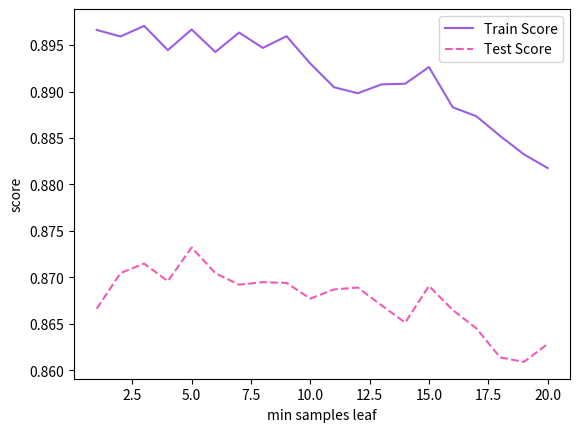

In [169]:
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

- 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며, 
    test 데이터의 성능 변화를 고려하여 12선택

In [180]:
#train 및 test 설명력 결과 저장
train_score = []; test_score =[]
# min_samples_split: 분리 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range (15,50)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, min_samples_leaf=12,
                                   n_estimators=40,min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#결과저장
df_score_split =pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score

In [181]:
df_score_split.round(3)

MinSamplesSplit  TrainScore  TestScore
0                30       0.891      0.870
1                32       0.891      0.870
2                34       0.891      0.870
3                36       0.890      0.867
4                38       0.889      0.864
5                40       0.889      0.864
6                42       0.889      0.864
7                44       0.890      0.866
8                46       0.889      0.867
9                48       0.889      0.867
10               50       0.886      0.865
11               52       0.889      0.866
12               54       0.888      0.867
13               56       0.887      0.865
14               58       0.882      0.863
15               60       0.882      0.863
16               62       0.882      0.863
17               64       0.882      0.862
18               66       0.883      0.861
19               68       0.882      0.862
20               70       0.882      0.861
21               72       0.882      0.863
22               74       0.882      0.863
23               76       0.879      0.859
24               78       0.883      0.863
25               80       0.885      0.862
26               82       0.882      0.859
27               84       0.881      0.860
28               86       0.881      0.860
29               88       0.881      0.860
30               90       0.879      0.858
31               92       0.879      0.858
32               94       0.874      0.856
33               96       0.876      0.856
34               98       0.878      0.859

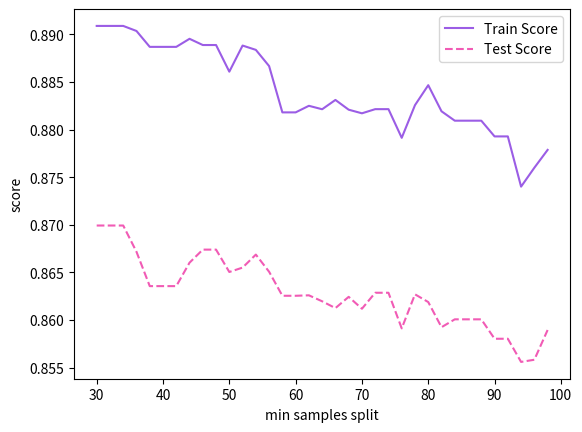

In [182]:
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며,
    Train/test 데이터의 성능 변화를 고려하여 35선택, 35보다 적은 영역에서는 변화 없음

In [188]:
#train 및 test 설명력 결과 저장
train_score = []; test_score =[]
# min_samples_split: 분리 노드의 최소 자료 수
para_depth = [depth for depth in range (1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, min_samples_leaf=12,
                                   min_samples_split=35, max_depth=v_max_depth
                                  ,n_estimators=40)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#결과저장
df_score_depth =pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score


In [189]:
df_score_depth.round(3)

Depth  TrainScore  TestScore
0      1       0.629      0.652
1      2       0.817      0.812
2      3       0.891      0.870
3      4       0.932      0.885
4      5       0.950      0.896
5      6       0.959      0.900
6      7       0.963      0.902
7      8       0.967      0.906
8      9       0.967      0.906
9     10       0.969      0.906

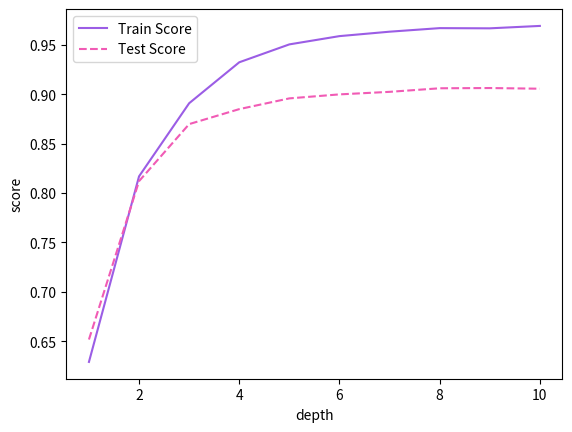

In [190]:
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

- 최대 깊이 증가에 따라 모델의 설명력은 증가하며,
    test 데이터의 성능 변화를 고려하여 5선택

In [191]:
#train 및 test 설명력 결과 저장
train_score = []; test_score =[]
# learning rate:학습률 변경 0.1 ~ 0.9
para_lr = [lr*0.1 for lr in range (1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, min_samples_leaf=12,
                                   min_samples_split=35, max_depth=5,learning_rate=v_learning_rate
                                  ,n_estimators=40)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#결과저장
df_score_lr =pd.DataFrame()
df_score_lr["LearningRate"]=para_lr
df_score_lr["TrainScore"]=train_score
df_score_lr["TestScore"]=test_score

In [192]:
df_score_lr.round(3)

LearningRate  TrainScore  TestScore
0           0.1       0.950      0.896
1           0.2       0.971      0.899
2           0.3       0.979      0.896
3           0.4       0.983      0.901
4           0.5       0.986      0.910
5           0.6       0.986      0.899
6           0.7       0.988      0.903
7           0.8       0.988      0.901
8           0.9       0.988      0.853

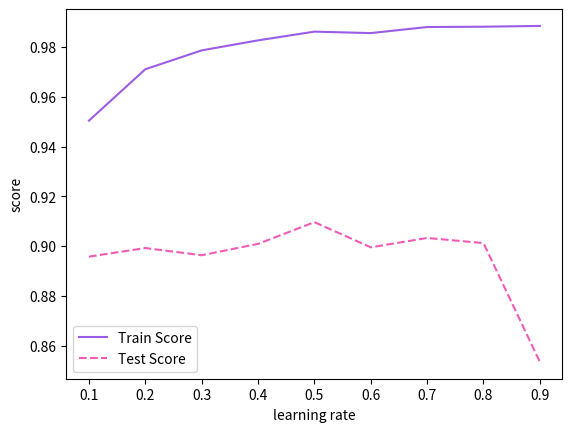

In [203]:
plt.plot(para_lr,train_score,linestyle="-",label="Train Score")
plt.plot(para_lr,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

- 학습률 증가에 따라 모델의 설명력은 증가하며,
    test의 data의 성능 변화를 고려하여 0.5 선택

In [204]:
#최종 모델
gb_final = GradientBoostingRegressor(min_samples_leaf=11, min_samples_split=22,max_depth=4,random_state=1234,n_estimators=30,learning_rate=0.5)
gb_final.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
# test 데이터 설명력
print("Score on test set:{:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Score on training set: 0.972
Score on test set:0.892


In [205]:
#변수명 저장
v_feature_name=df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False,inplace=True)
df_importance.round(3)

Feature  Importance
0              cement       0.329
7                 age       0.326
3               water       0.113
1  blast_furnace_slag       0.106
4    superplasticizer       0.055
6      fine_aggregate       0.044
5    coarse_aggregate       0.015
2             fly_ash       0.012

Text(0, 0.5, '변수')

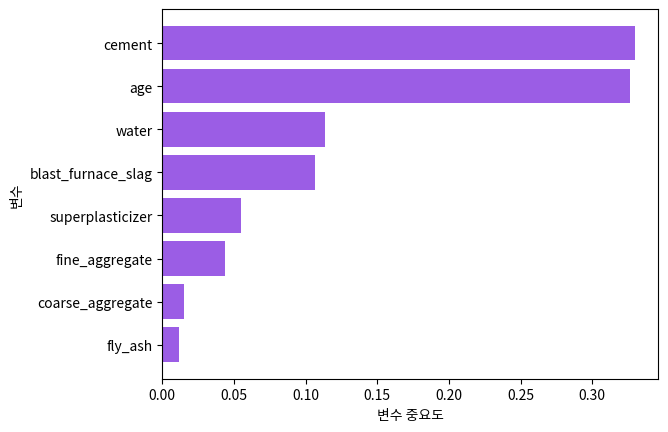

In [206]:
# 설명 변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width =df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# Gradient Boosting

### estimators = 40
### leaf = 11
### split = 22
### depth = 4
### learning_rate= 0.5 를 선택하여

## Before Parameter 조정
### Train : 0.954
### Test : 0.898
    
## After Parameter 조정
### Train: 0.972
### Test: 0.892
    
    
# 결론: 콘크리트에서 강도를 분류하는 가장 중요한 변수는 cement, age이다.

# Gradient Boosting을 사용한 모델이 적합하다.
# 최종결론:  비선형 회귀분석을 통해 콘크리트 강도를 결정하는 중요한 요소는 Cement와 Age인 것을 알 수 있다.